# brazil-covid-19

Import section:

In [654]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

Variables section:

In [655]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
minimum_confirmed_cases_to_analize =10000
minimum_deaths_cases_to_analize = 500
minimum_recovered_cases_to_analize = 200

Configs section:

In [656]:
seaborn.set_style("whitegrid")
seaborn.set_context("talk")

Function section:

In [657]:
def replace_less_than_with_nan(dataframe, less_than):
    for column in dataframe:
        if column == 'country':
            continue
        dataframe[column] = dataframe[column].astype(int)
        dataframe.loc[dataframe[column] < less_than, [column]] = numpy.nan
    return dataframe

def move_nans_to_right(dataframe):
    temp_dataframe = dataframe.apply(lambda x: pandas.Series(x.dropna().values), axis=1)
    temp_dataframe = temp_dataframe.reindex(columns=range(len(dataframe.columns)))
    temp_dataframe.columns = dataframe.columns
    return temp_dataframe

## Confirmed Cases (log):

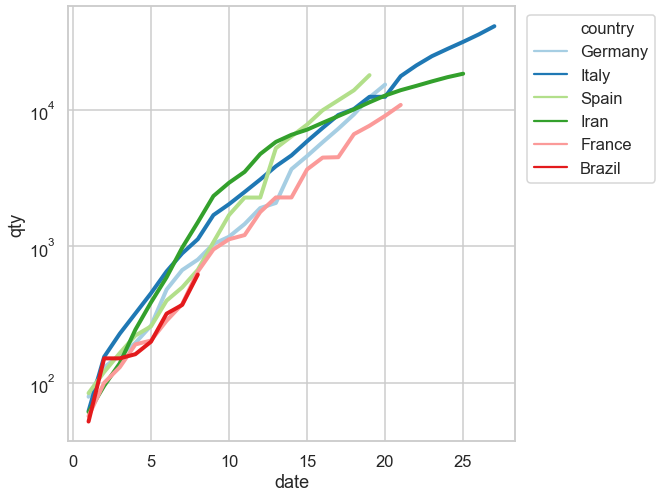

In [666]:
data = pandas.read_csv(url_confirmed)
data = data.drop(['Lat', 'Long','Province/State'], axis=1)
data = data[~data['Country/Region'].str.contains("China")]
brazil_data = data[data["Country/Region"].str.match('Brazil')]
data = data[data[data.columns[-1]] > minimum_confirmed_cases_to_analize]
data = data.append(brazil_data, ignore_index=True)
data = data.rename(columns={ data.columns[0]: "country" })

data = replace_less_than_with_nan(data, 50)
data = move_nans_to_right(data)
data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)))}, inplace = True)
data.rename(columns={ data.columns[0]: "country" }, inplace = True)
data = data.melt(id_vars=['country'], var_name='date', value_name='qty')

fig, ax = pyplot.subplots(figsize=(8,8))
ax.set(yscale="log")
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)

## Deaths Cases (log):

In [659]:
data = pandas.read_csv(url_deaths)
data = data.drop(['Lat', 'Long','Province/State'], axis=1)
data = data[~data['Country/Region'].str.contains("China")]
brazil_data = data[data["Country/Region"].str.match('Brazil')]
data = data[data[data.columns[-1]] > minimum_recovered_cases_to_analize]
data = data.append(brazil_data, ignore_index=True)
data = data.rename(columns={ data.columns[0]: "country" })

data = replace_less_than_with_nan(data, 1)
data = move_nans_to_right(data)
data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)))}, inplace = True)
data.rename(columns={ data.columns[0]: "country" }, inplace = True)
data = data.melt(id_vars=['country'], var_name='date', value_name='qty')

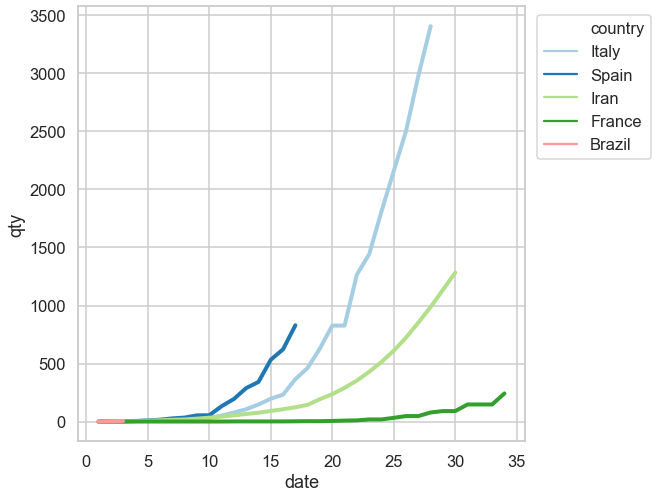

In [660]:
fig, ax = pyplot.subplots(figsize=(8,8))
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)

### Log

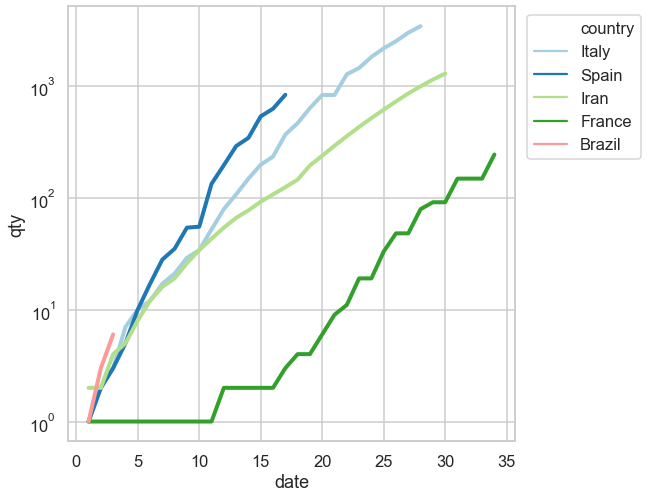

In [661]:
fig, ax = pyplot.subplots(figsize=(8,8))
ax.set(yscale="log")
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)

## Recovered Cases:

In [662]:
data = pandas.read_csv(url_recovered)
data = data.drop(['Lat', 'Long','Province/State'], axis=1)
data = data[~data['Country/Region'].str.contains("China")]
brazil_data = data[data["Country/Region"].str.match('Brazil')]
data = data[data[data.columns[-1]] > minimum_deaths_cases_to_analize]
data = data.append(brazil_data, ignore_index=True)
data = data.rename(columns={ data.columns[0]: "country" })

data = replace_less_than_with_nan(data, 1)
data = move_nans_to_right(data)
data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)))}, inplace = True)
data.rename(columns={ data.columns[0]: "country" }, inplace = True)
data = data.melt(id_vars=['country'], var_name='date', value_name='qty')

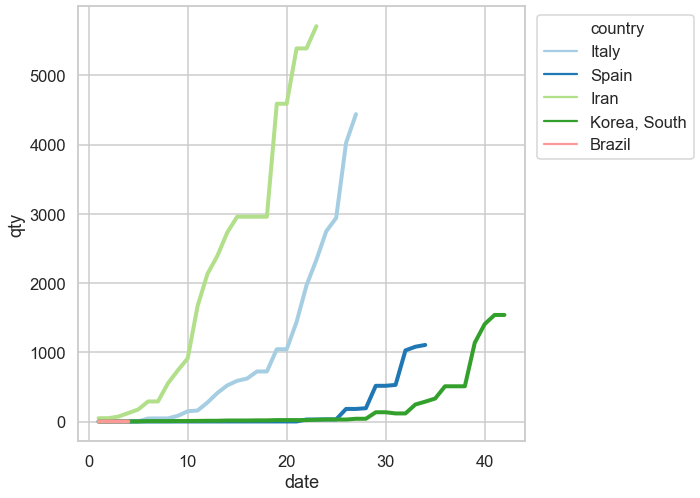

In [663]:
fig, ax = pyplot.subplots(figsize=(8,8))
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)

### Log

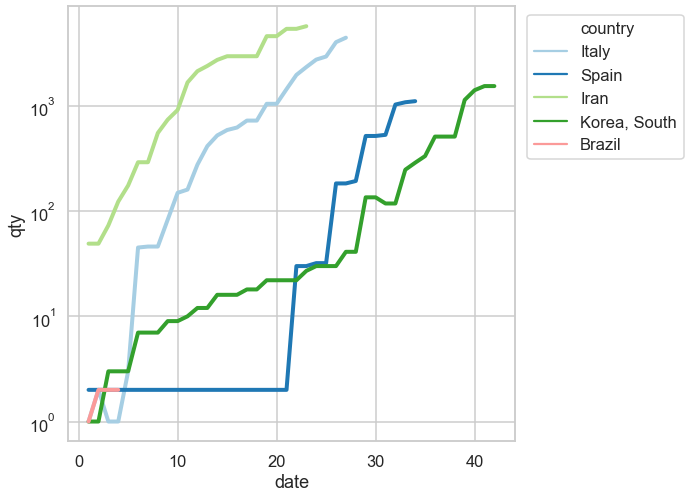

In [664]:
fig, ax = pyplot.subplots(figsize=(8,8))
ax.set(yscale="log")
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)